## Advanced Regression Assignment: Predicting House Prices

The solution is structured into the following segments:

1. Understanding and exploring the data
2. Cleaning the data
3. Preparing the data
4. Building and evaluating the model
5. Observations and inferences


In [79]:
# Importing necessary libraries for data manipulation and analysis
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
pd.options.display.max_rows = 100  # Setting maximum displayed rows for Pandas
pd.options.display.max_columns = 100  # Setting maximum displayed columns for Pandas

# Importing visualization libraries
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced data visualization

# Importing machine learning libraries for regression analysis
from sklearn import linear_model  # General linear regression models
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.linear_model import Ridge  # Ridge regression model
from sklearn.linear_model import Lasso  # Lasso regression model
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.preprocessing import PolynomialFeatures  # Polynomial features for regression
from sklearn.pipeline import Pipeline  # Pipeline for combining multiple steps in modeling
from sklearn import metrics  # Metrics for model evaluation

# Importing utility libraries
import os  # Operating system-dependent functionalities

# Hiding warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [80]:
# Configation of the dataset
dataset = pd.read_csv("train.csv", encoding = 'utf-8')
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [95]:
# Examine column information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [96]:
#Checking the shape of the dataframe
dataset.shape

(1460, 81)

In [97]:
# Retrieving the dataset description
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [98]:
# Evaluating the percentage of null values in the dataset

round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [99]:
#Verifying for duplicates
sum(dataset.duplicated(subset = 'Id')) == 0

True

In [100]:
#Assessing the percentage of null values in the dataset

round(100 * (dataset.isnull().sum() / len(dataset.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [102]:
#Inspecting numerical column outliers through descriptive statistics

dataset.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

### Function to remove outliers from a DataFrame based on a specified column

In [103]:
def remove_outliers(data_frame, column_name):
    # Calculate the first quartile (Q1)
    q1 = data_frame[column_name].quantile(0.25)
    
    # Calculate the third quartile (Q3)
    q3 = data_frame[column_name].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter out rows where the column values are within the bounds
    outliers_removed = data_frame[(data_frame[column_name] < upper_bound) & (data_frame[column_name] > lower_bound)]
    
    return outliers_removed

In [104]:
#Checking the shape of the dataframe
dataset.shape

(1460, 81)

In [106]:
# Identifying columns with missing values
columns_with_nulls = dataset.columns[dataset.isnull().any()]

# Calculating the percentage of null values for each column
null_percentage = dataset.isnull().sum() / len(dataset) * 100

# Filtering columns with non-zero null percentages
null_percentage_filtered = null_percentage[null_percentage > 0]

# Sorting columns based on null percentages in descending order
null_percentage_sorted = null_percentage_filtered.sort_values(ascending=False)
null_percentage_sorted

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

### As per the provided data dictionary, null values in these columns signify the absence of certain facilities, potentially impacting the price. 

   ### Consequently, our initial step is to fill in the missing values for categorical variables with 'None'.

In [108]:
# Imputing categorical variables with 'None' for columns where null values have specific meanings
columns_with_meaningful_nulls = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for column in columns_with_meaningful_nulls:
    dataset[column].fillna("None", inplace=True)

In [109]:
# Reassessing null values

columns_with_nulls_again = dataset.columns[dataset.isnull().any()]

# Calculating the updated percentage of null values for each column
null_percentage_2 = dataset.isnull().sum() / len(dataset) * 100

# Filtering columns with non-zero updated null percentages
null_percentage_filtered_2 = null_percentage_2[null_percentage_2 > 0]

# Sorting columns based on updated null percentages in descending order
null_percentage_sorted_2 = null_percentage_filtered_2.sort_values(ascending=False)
null_percentage_sorted_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [116]:
dataset[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].describe()

LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
max     313.000000  2010.000000  1600.000000

In [117]:
dataset['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [119]:
# Explanation:
# Referring to the data dictionary, "LotFrontage" indicates the linear feet of street connected to the property.
# As it is a numeric variable with a reasonably even distribution, we can fill missing values by using the median value within the corresponding 'Neighborhood'.

# Filling missing values in 'LotFrontage' with the median based on the 'Neighborhood' grouping
dataset['LotFrontage'] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Imputing missing values in 'GarageYrBlt' and 'MasVnrArea' with their respective medians
dataset["GarageYrBlt"].fillna(dataset["GarageYrBlt"].median(), inplace=True)
dataset["MasVnrArea"].fillna(dataset["MasVnrArea"].median(), inplace=True)

# Removing rows with missing values in the 'Electrical' column
dataset["Electrical"].dropna(inplace=True)

In [120]:
dataset[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].describe()

LotFrontage  GarageYrBlt   MasVnrArea
count  1460.000000  1460.000000  1460.000000
mean     70.199658  1978.589041   103.117123
std      22.431902    23.997022   180.731373
min      21.000000  1900.000000     0.000000
25%      60.000000  1962.000000     0.000000
50%      70.000000  1980.000000     0.000000
75%      80.000000  2001.000000   164.250000
max     313.000000  2010.000000  1600.000000

In [121]:
dataset['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

### EDA Part

In [128]:
#Every numerical (float and int) variable present in the dataset.

data = dataset.select_dtypes(include=['float64', 'int64'])
data.head() # Before

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [129]:
# Dropping ID Column
data = data.drop(['Id'], axis=1)
data.head() # After

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

#### Comparison of the target variable 'Sale Price' with a subset of chosen columns.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

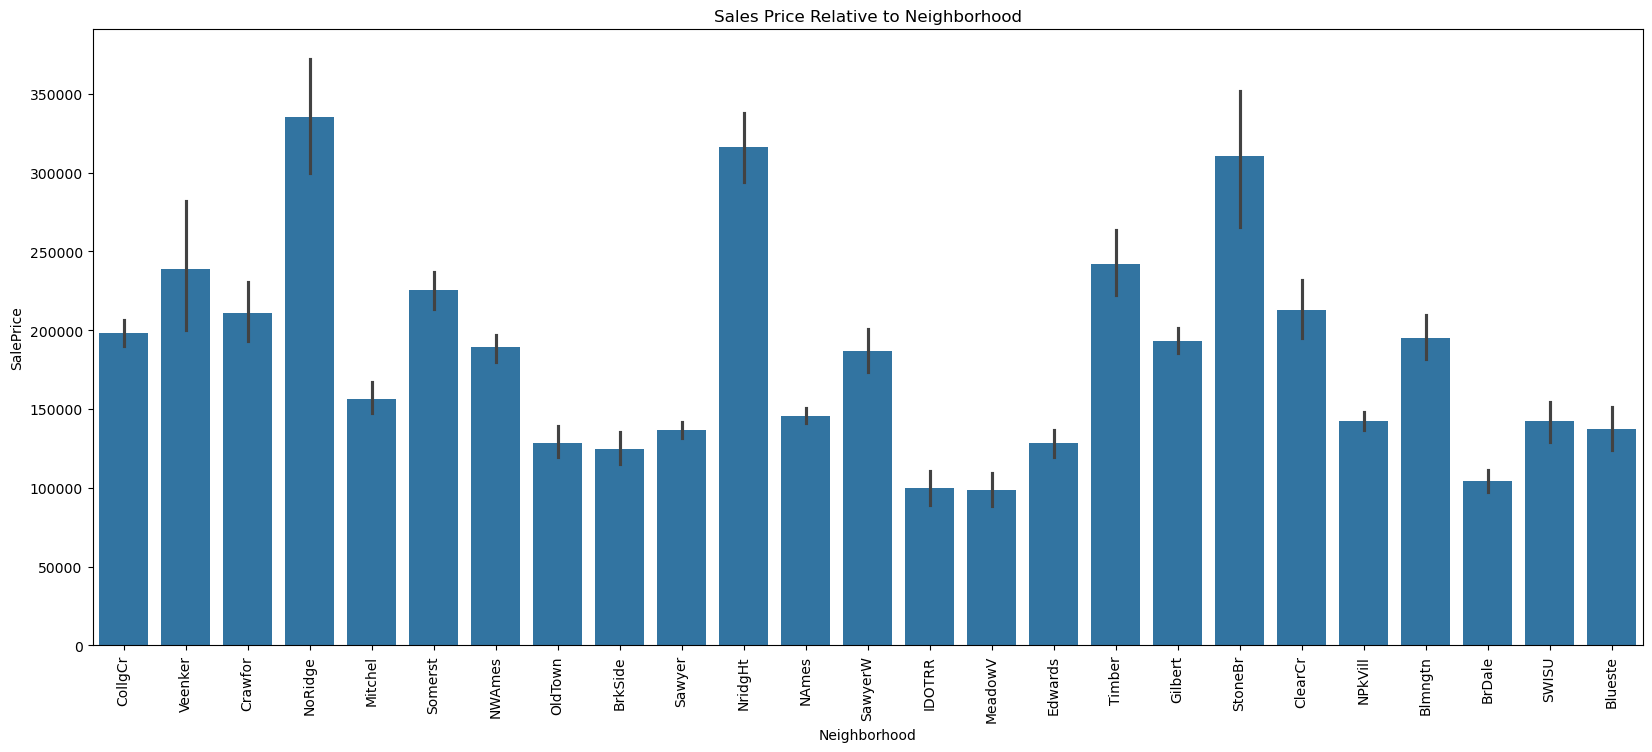

In [132]:
# Visualize 'Sale Price' in relation to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=dataset)
plt.title("Sales Price Relative to Neighborhood")
plt.xticks(rotation=90)

#### Homes in certain neighborhoods command premium prices.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

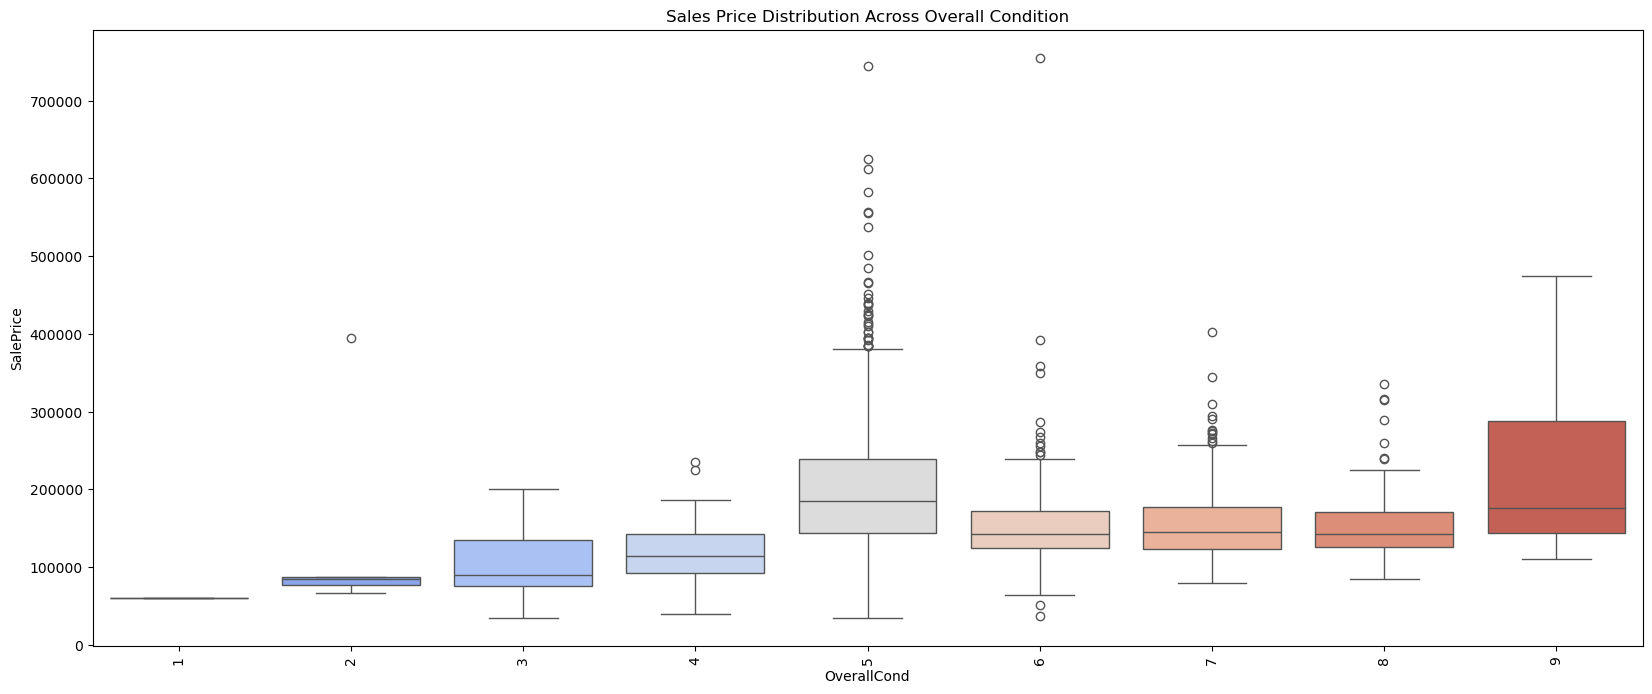

In [140]:
# Visualize 'Sale Price' in relation to 'Overall Condition' with a meaningful and colorful graph

plt.figure(figsize=(20, 8))
sns.boxplot(x="OverallCond", y="SalePrice", data=dataset, palette="coolwarm")
plt.title("Sales Price Distribution Across Overall Condition")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

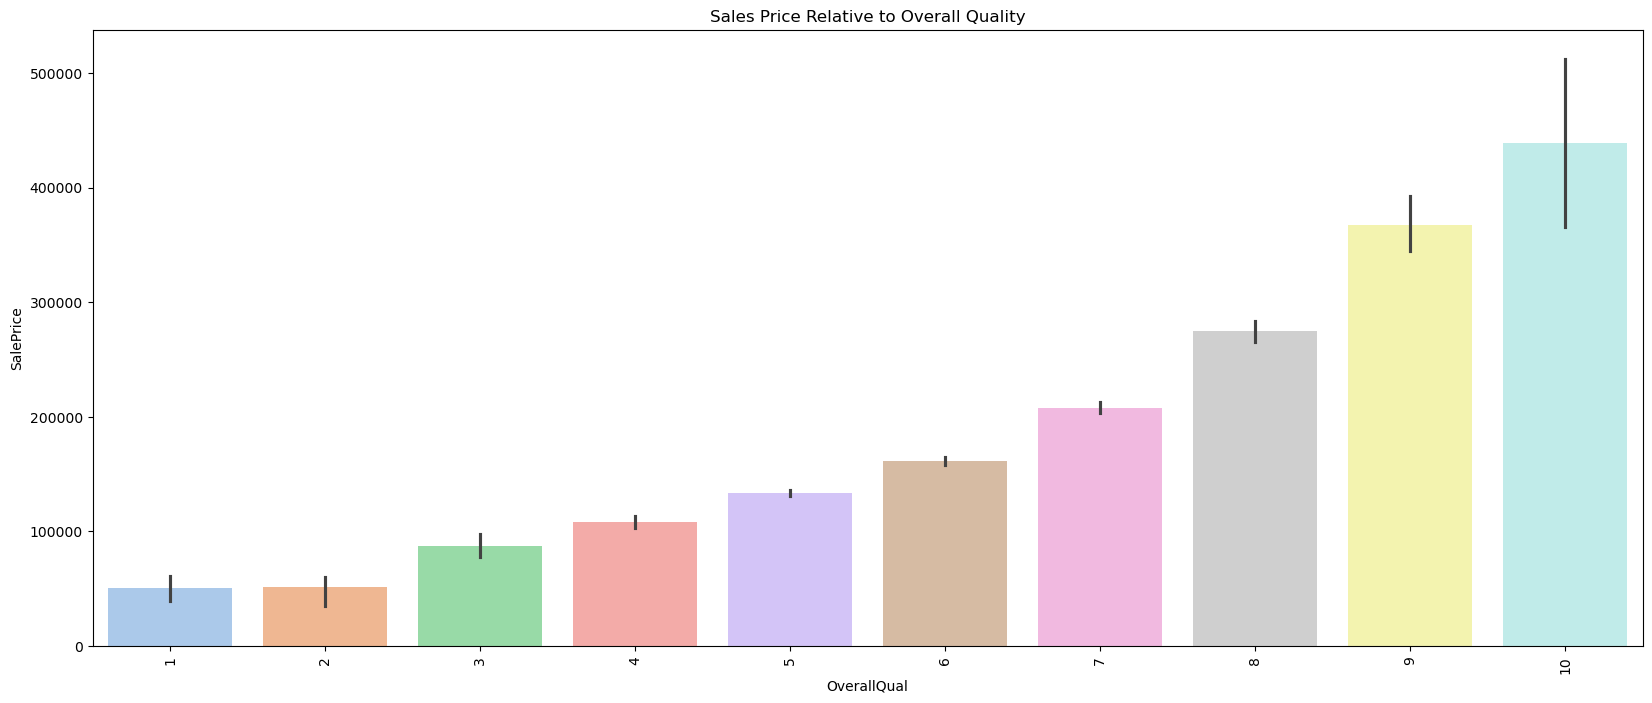

In [139]:
# Visualize 'Sale Price' in relation to 'Overall Quality' with distinctive colors

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data=dataset, palette="pastel")
plt.title("Sales Price Relative to Overall Quality")
plt.xticks(rotation=90)


#### Improving the overall quality directly correlates with an increase in the sale price.

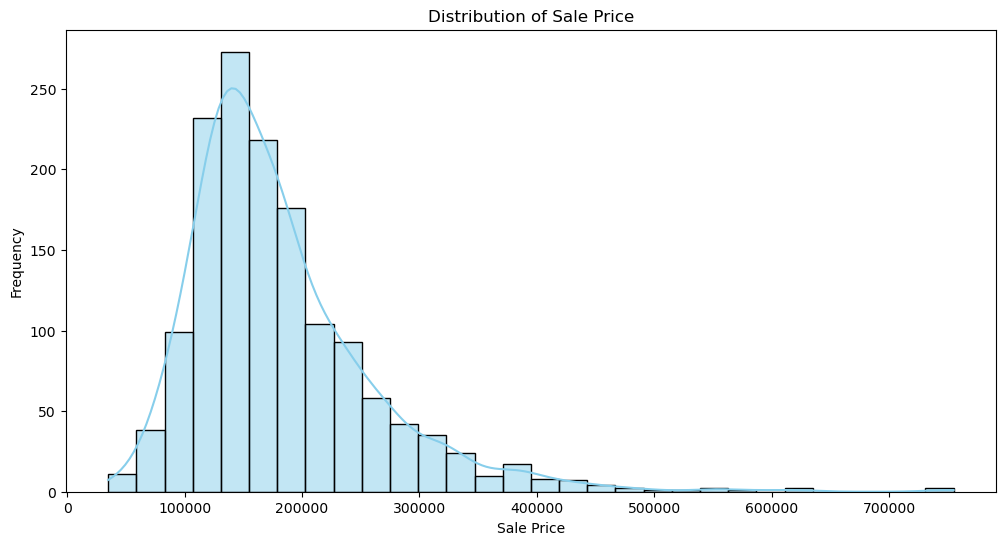

In [141]:
# Visualize the distribution of 'SalePrice' using a different type of plot

plt.figure(figsize=(12, 6))
sns.histplot(dataset['SalePrice'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [142]:
data_clone = dataset.copy

### Due to the leftward skewness in the Sale Price distribution, we will apply a log transformation to achieve a more centered dataset.

In [144]:
# Applying log transformation to 'SalePrice'

dataset['SalePrice'] = np.log1p(dataset['SalePrice'])

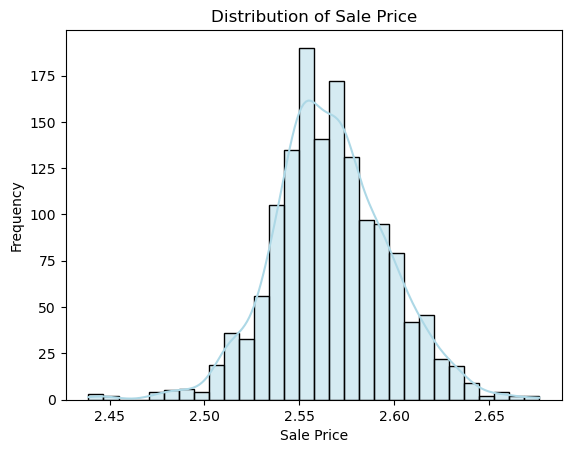

In [146]:
# Visualize the distribution of 'SalePrice' using a different informative plot

# Visualizing the distribution of 'SalePrice' using a plot
sns.histplot(dataset['SalePrice'], kde=True, color='lightblue', bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [147]:
# Generating the correlation matrix
correlation_matrix = data.corr()
correlation_matrix

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

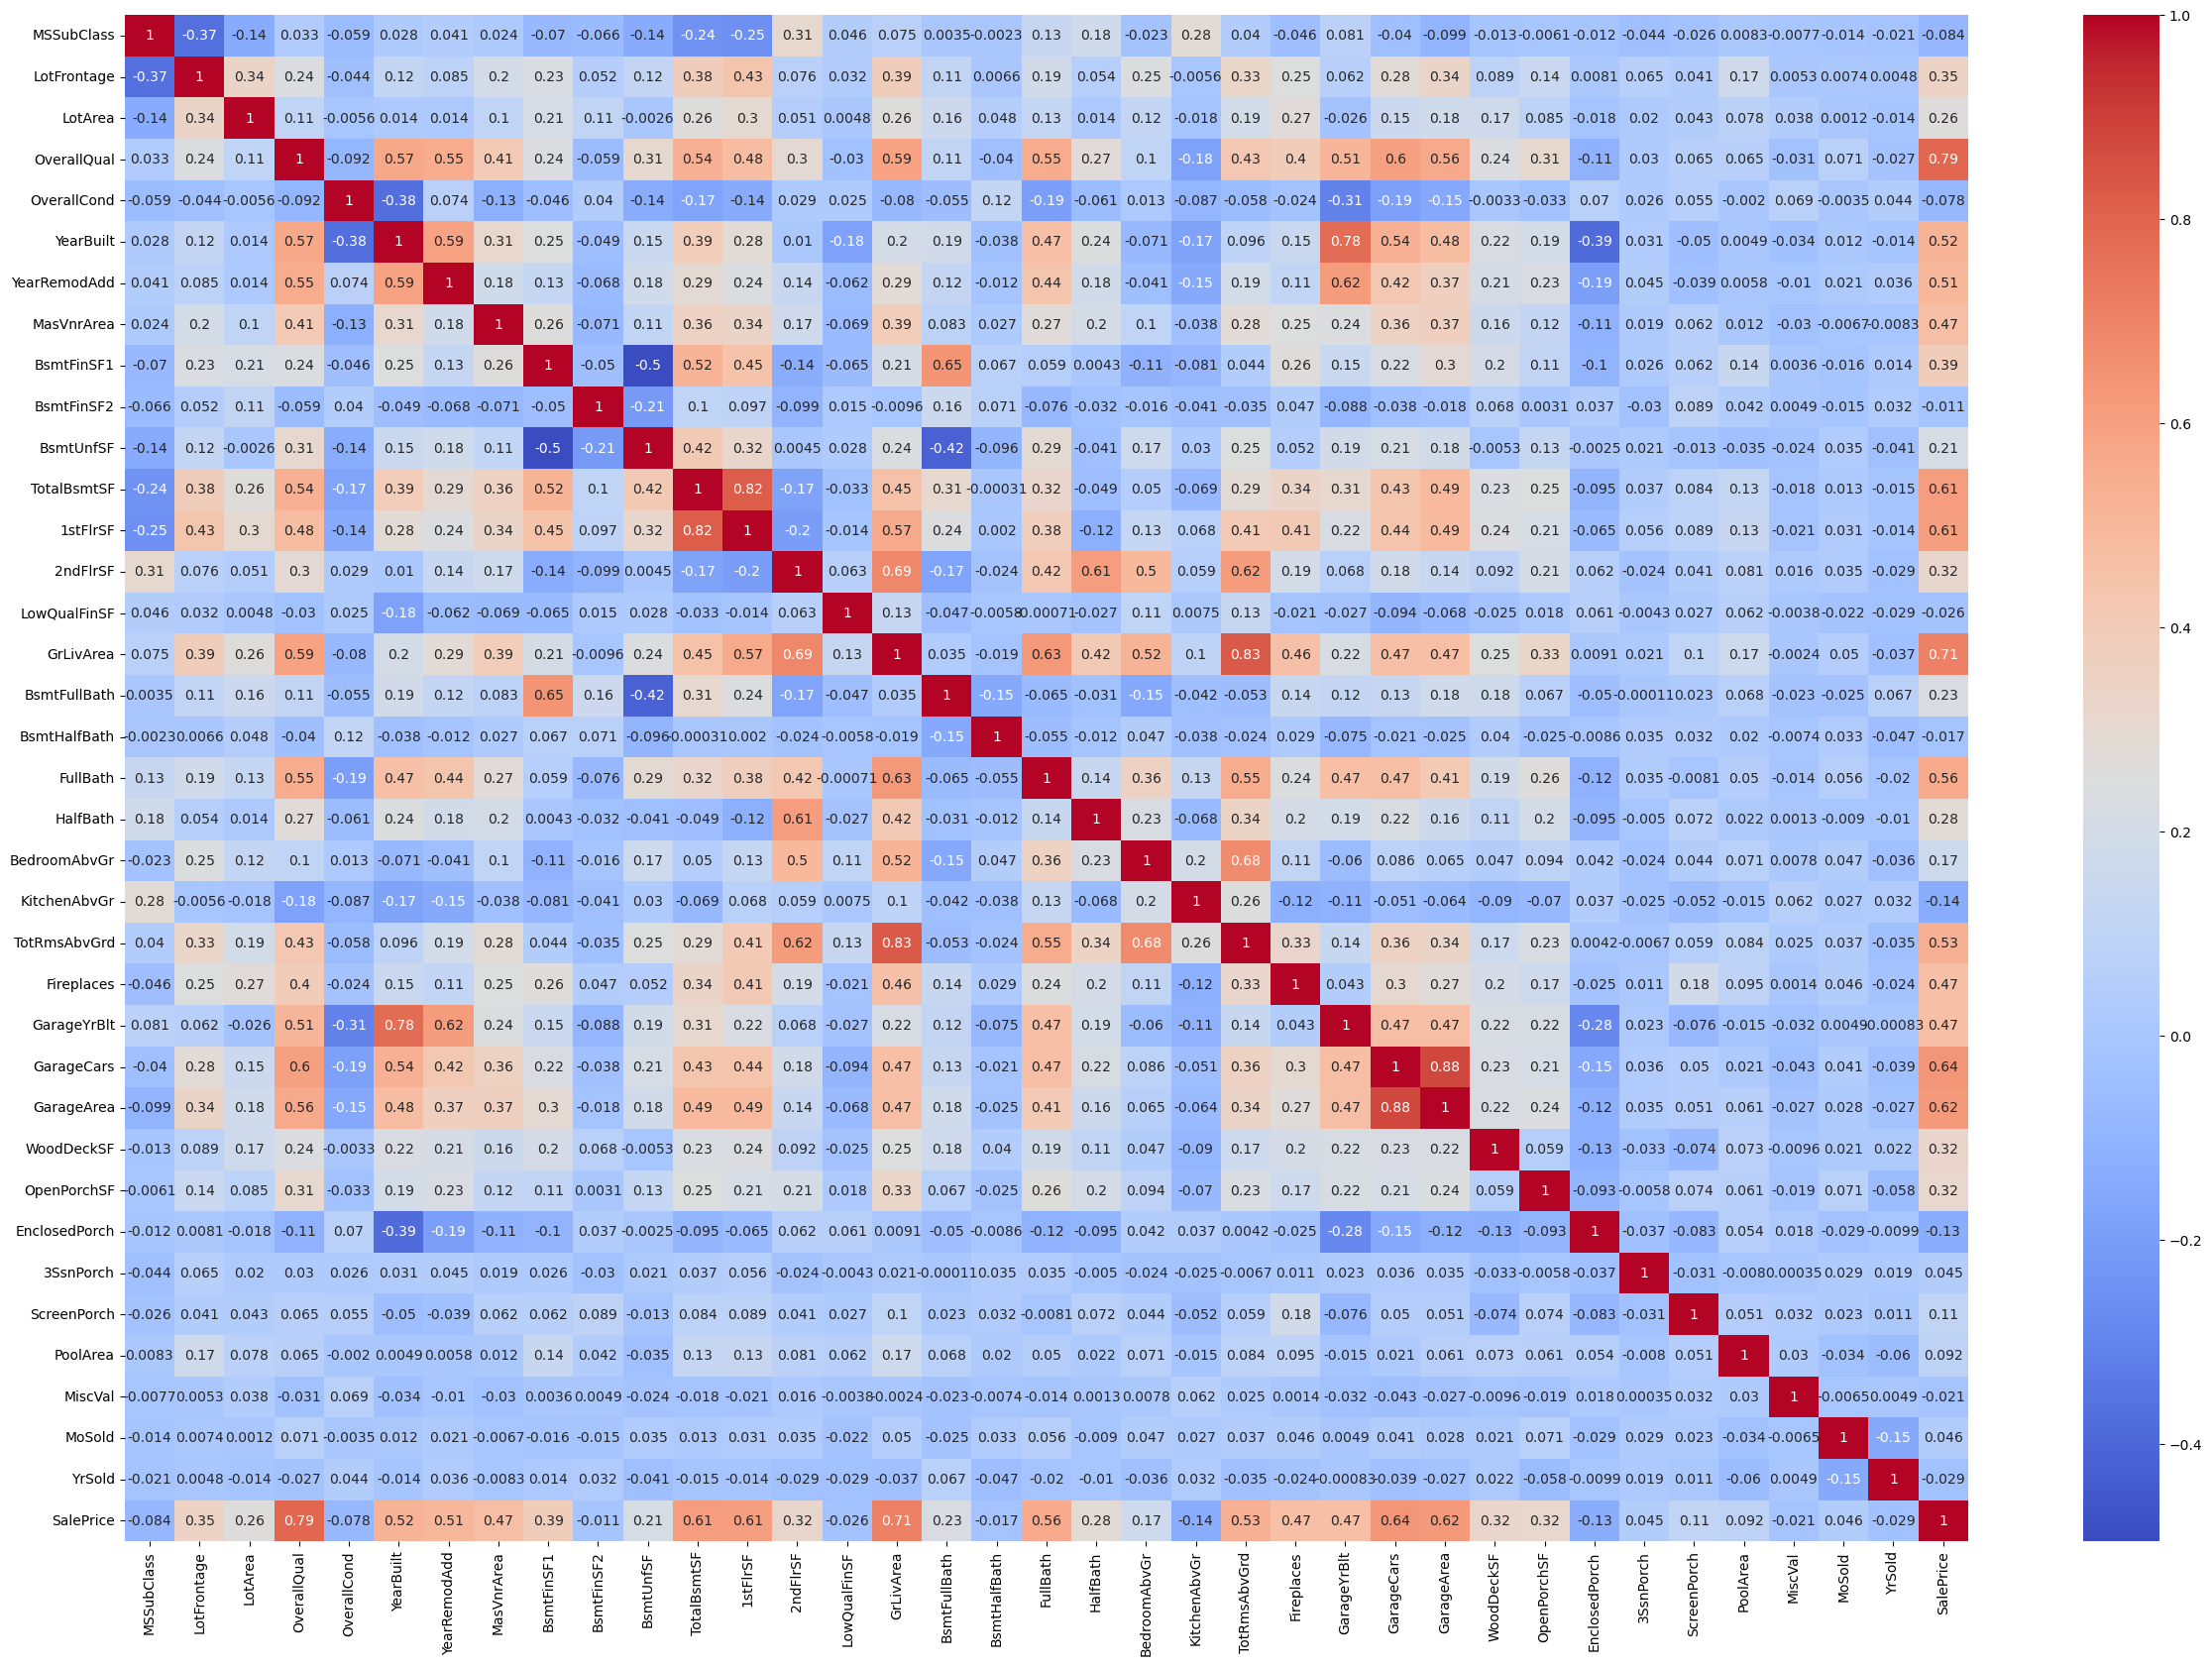

In [152]:
# Visualizing correlations with a heatmap

# Setting the figure size
plt.figure(figsize=(30, 20))

# Creating a heatmap with a different color map and annotations
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)

# Displaying the heatmap
plt.show()

#### Observable correlations exist among certain variables.
#### Prior to discarding these columns, we will assess their predictive capabilities.

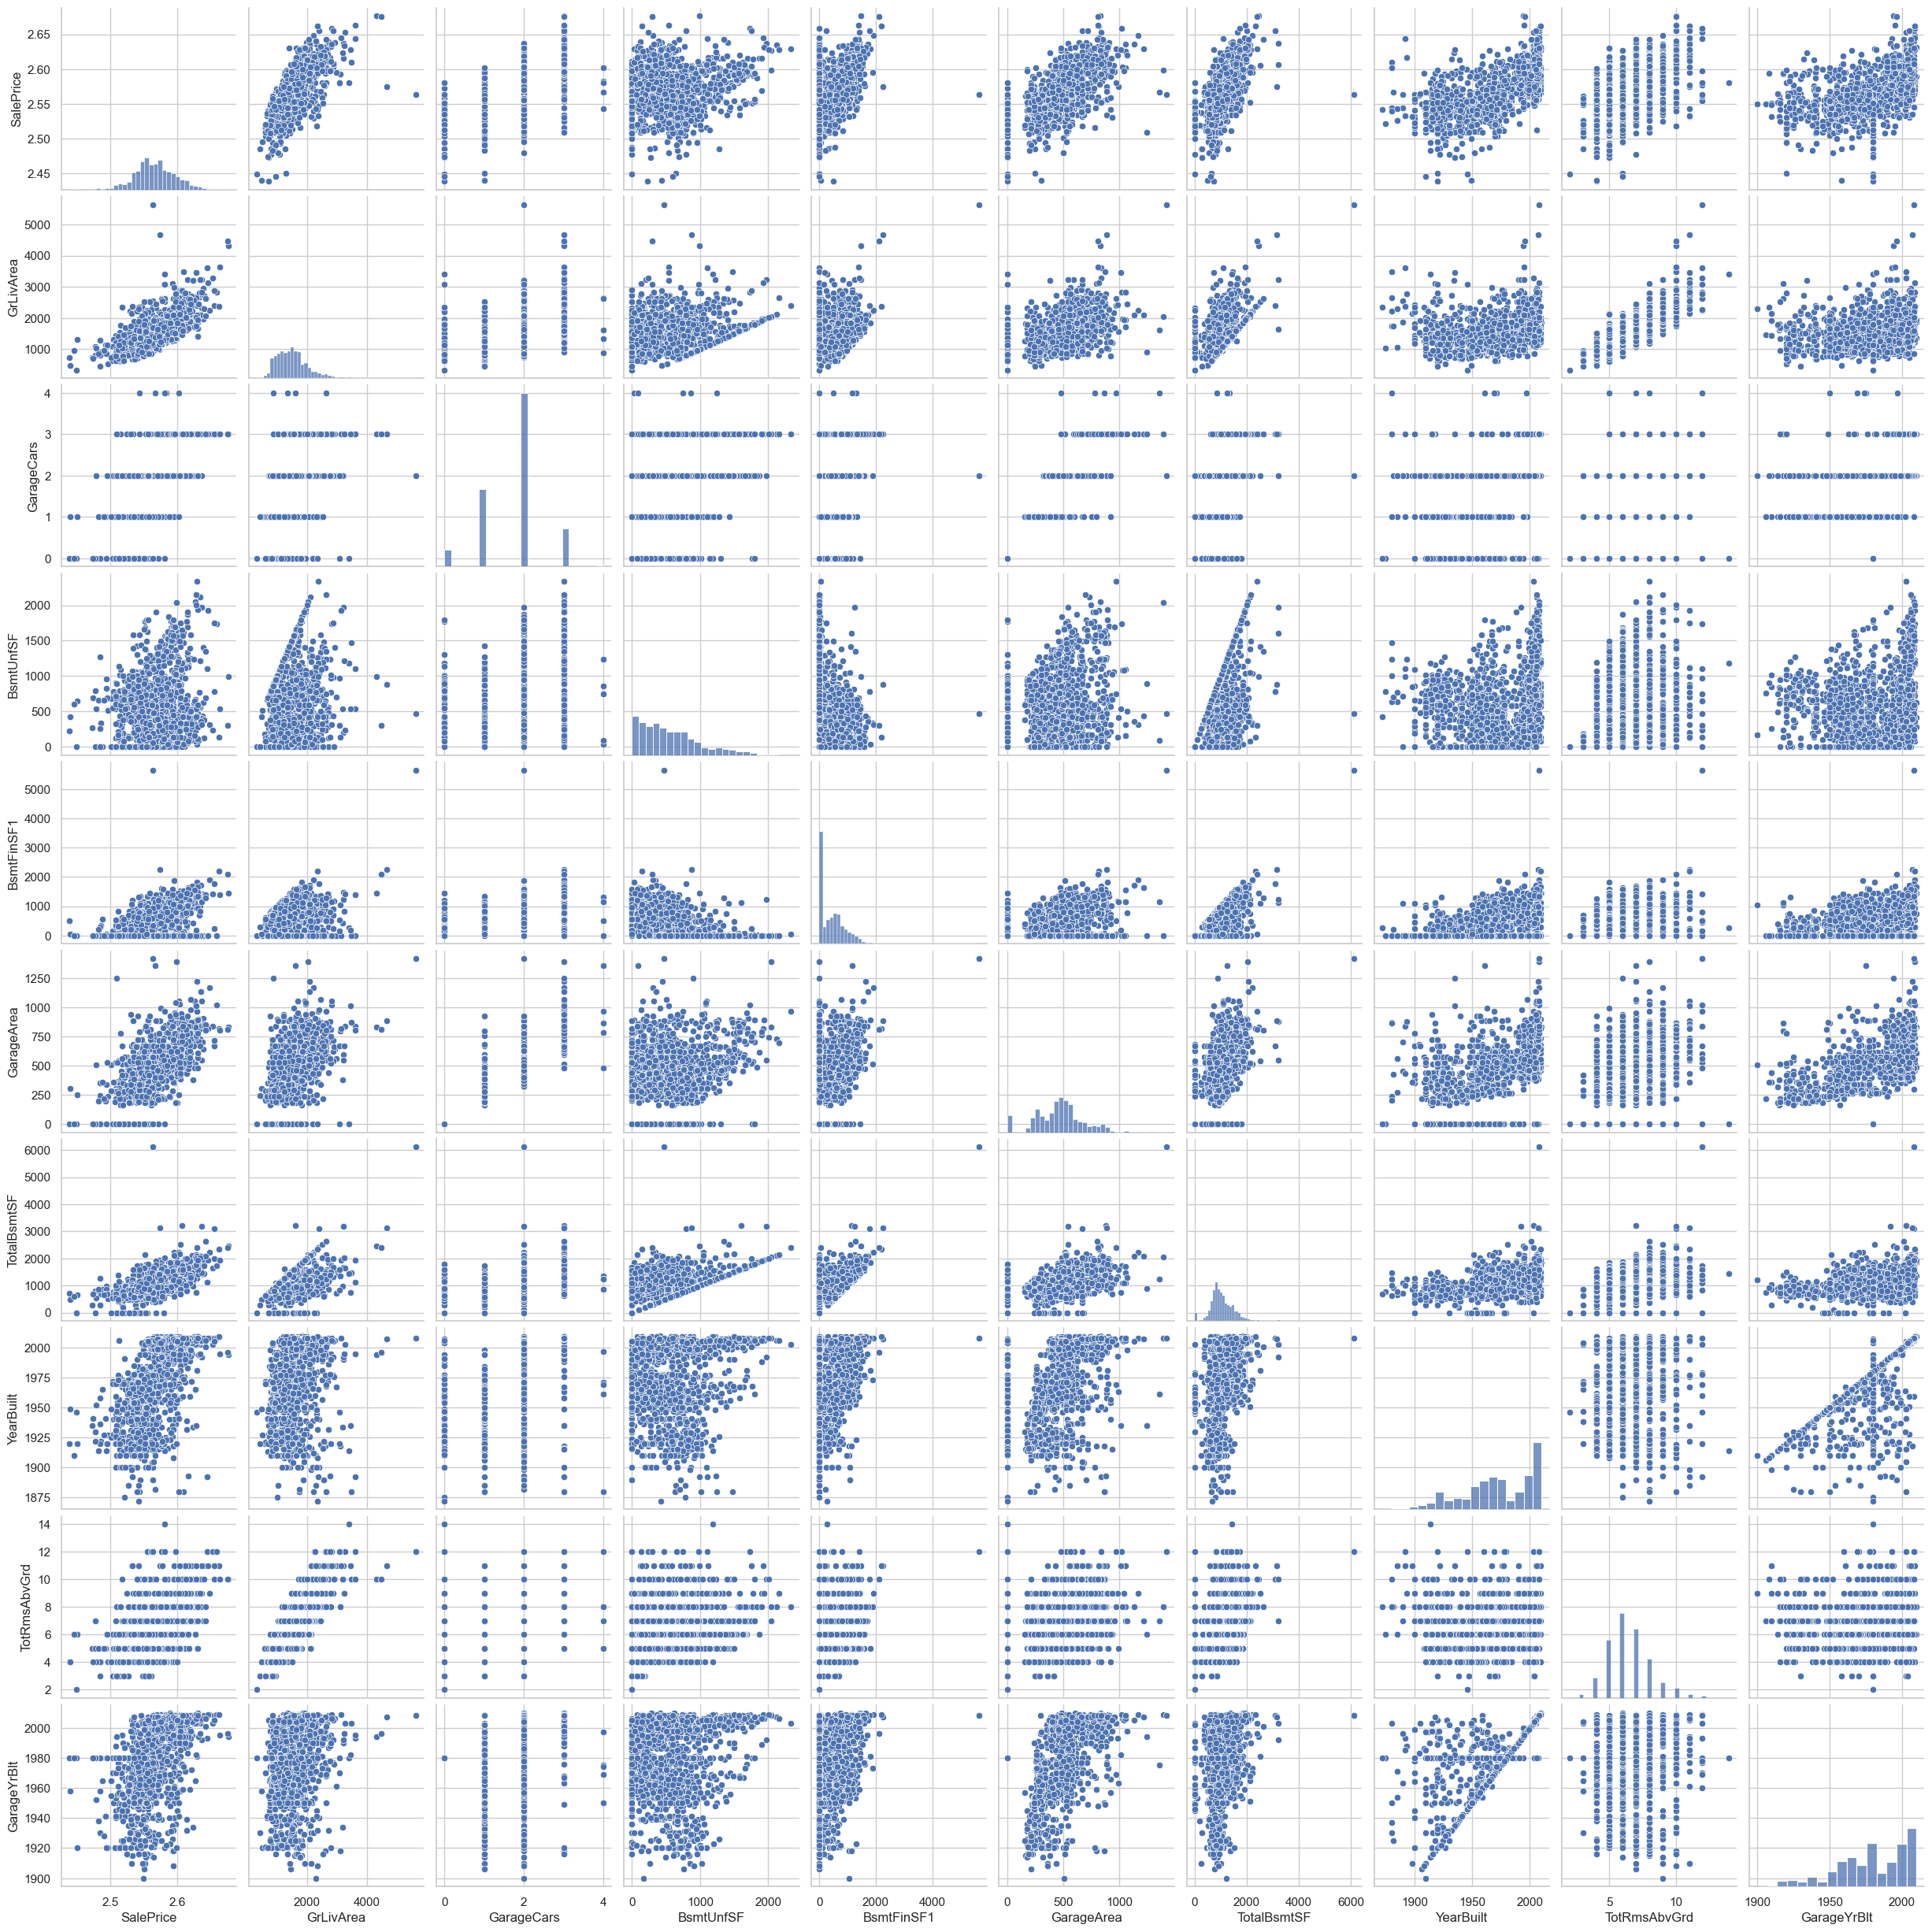

In [155]:
# Checking relationships with a pairplot using distinctive colors
sns.set(style="whitegrid")
selected_cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(dataset[selected_cols], height=2.5, palette="husl")
plt.show()

#### Eliminate columns that exhibit correlation without significant contribution to 'SalePrice'

In [156]:
# Optimized code to drop columns from 'dataset'
dataset.drop(['GarageCars', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt'], axis=1, inplace=True)
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

In [158]:
# Numeric columns
dataset.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          2003          2003       196.0         706           0   
1          1976          1976         0.0         978           0   
2          2001          2002       162.0         486           0   
3          1915          1970         0.0         216           0   
4          2000          2000       350.0         655           0   
...         ...           ...         ...         ...         ...   
1455       1999          2000         0.0           0           0   
1456       1978          1988       119.0         790         163   
1457       1941          2006         0.0         275           0   
1458       1950          1996         0.0          49        1029   
1459       1965          1965         0.0         830         290   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0         548           0           61              0   
1              1         460         298            0              0   
2              1         608           0           42              0   
3              1         642           0           35            272   
4              1         836         192           84              0   
...          ...         ...         ...          ...   

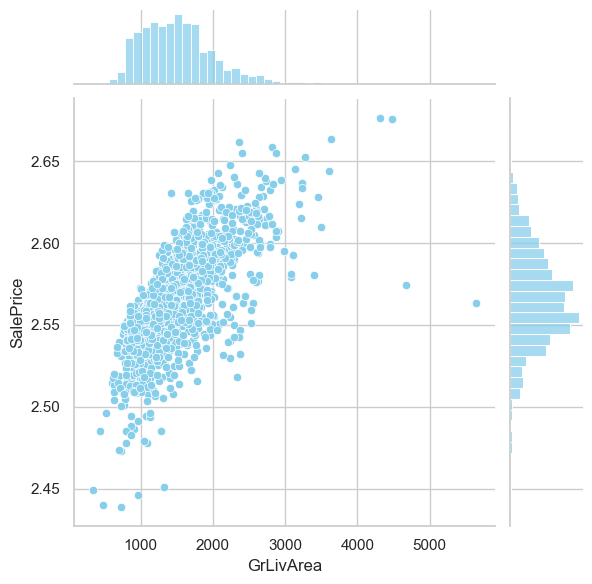

In [159]:
# Examine key numerical columns using a joint plot with distinct colors
sns.jointplot(x='GrLivArea', y='SalePrice', data=dataset, color='skyblue')
plt.show()

In [160]:
# Eliminating outliers on the lower right side of 'GrLivArea'
dataset = remove_outliers(dataset, 'GrLivArea')

In [162]:
# Given the dataset's limited size, it is not recommended to eliminate outliers.

dataset.shape

(1429, 77)

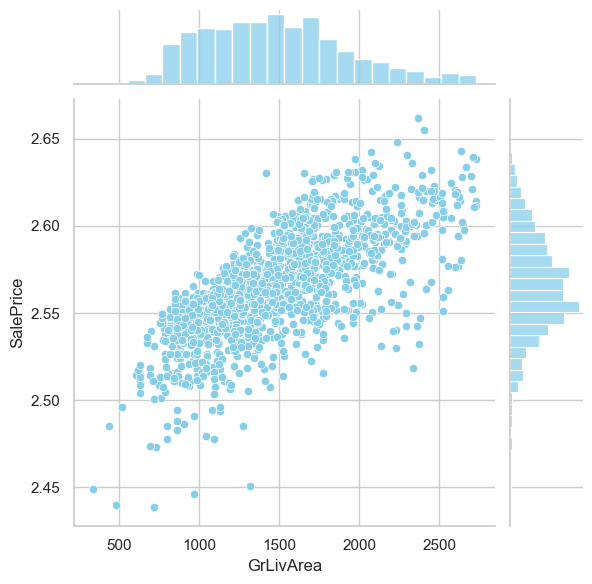

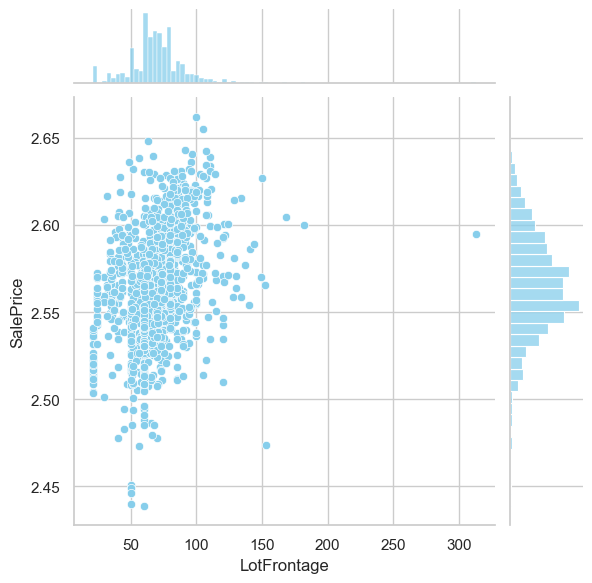

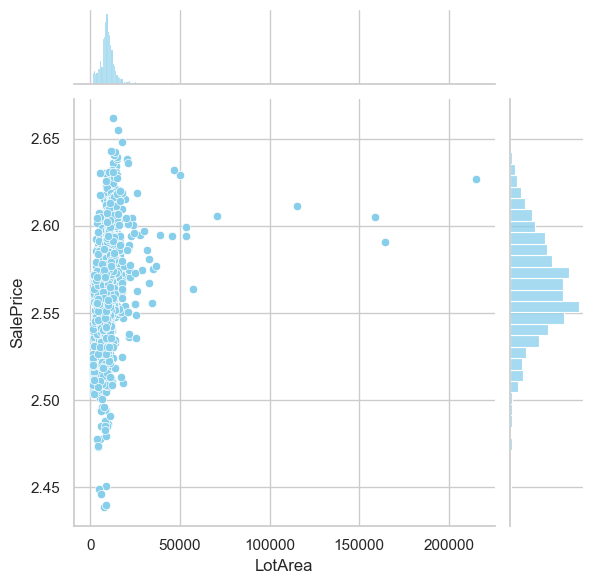

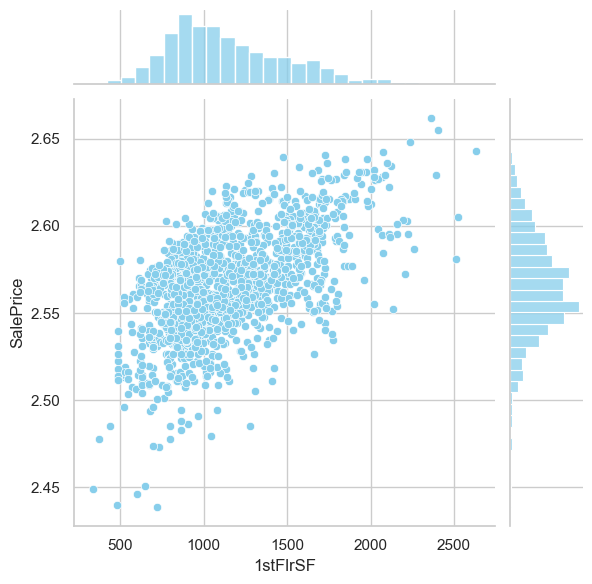

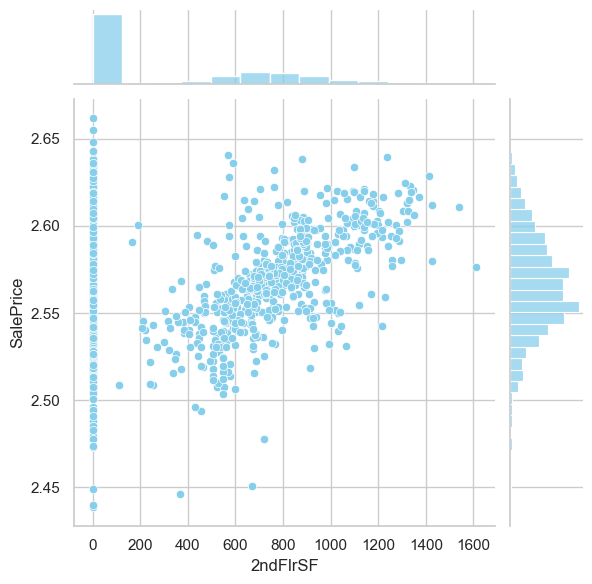

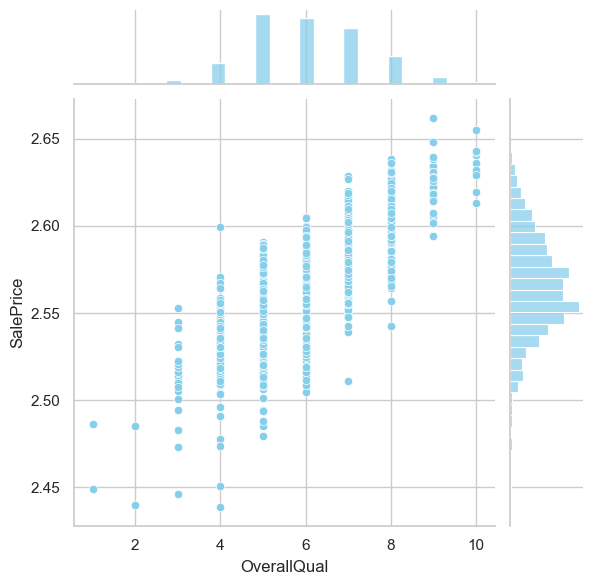

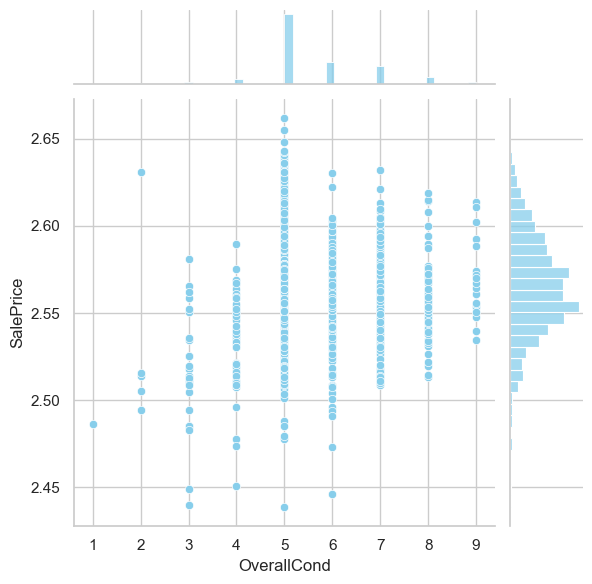

In [164]:
# Optimized code for joint plots with SalePrice using different numeric columns in 'dataset'

columns_to_plot = ['GrLivArea', 'LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond']

for column in columns_to_plot:
    sns.jointplot(x=dataset[column], y=dataset['SalePrice'], color='skyblue')
    plt.show()

#### Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [48]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

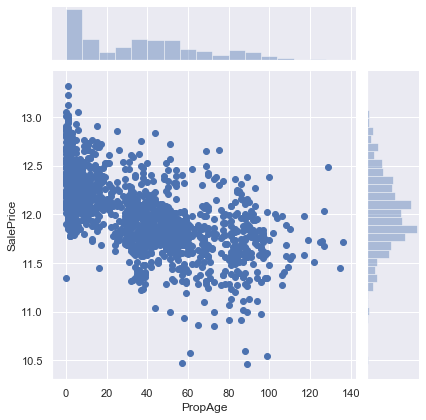

In [49]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

#### A rise in property age is associated with a declining trend in sale prices, indicating that newer properties tend to have higher values.
#### Now, we can discard the columns for the month sold, year sold, year built, and year remodeled as they won't be needed for further analysis.

In [165]:
# Optimized code to drop unnecessary columns from 'dataset'
columns_to_drop = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']
dataset.drop(columns=columns_to_drop, inplace=True)

In [168]:
dataset[['Street', 'Utilities']].apply(lambda x: x.value_counts())

Street  Utilities
AllPub     NaN     1428.0
Grvl       6.0        NaN
NoSeWa     NaN        1.0
Pave    1423.0        NaN

In [169]:
# Dropping columns with very low variance in 'dataset'
dataset.drop(['Street', 'Utilities'], axis=1, inplace=True)

In [174]:
# Inspecting the variance of numeric columns in 'dataset'
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])
numeric_columns

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          196.0         706           0          856       856       854   
1            0.0         978           0         1262      1262         0   
2          162.0         486           0          920       920       866   
3            0.0         216           0          756       961       756   
4          350.0         655           0         1145      1145      1053   
...          ...         ...         ...          ...       ...       ...   
1455         0.0           0           0          953       953       694   
1456       119.0         790         163         1542      2073         0   
1457         0.0         275           0         1152      1188      1152   
1458         0.0          49        1029         1078      1078         0   
1459         0.0         830         290         1256      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0                3             1           0         548           0   
1                3             1           1         460         298   
2                3             1           1         608           0   
3                3             1           1         642           0   
4                4             1           1         836         192   
...            ...           ...         ...         ...         ...   
1455             3             1           1         460           0   
1456             3             1           2         500         349   
1457             4             1           2         252           0   
1458             2             1           0         240         366   
1459             3             1           0         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272        

In [175]:
for i in numeric_columns:
    print(dataset[i].value_counts())

Id
1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: count, Length: 1429, dtype: int64
MSSubClass
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: count, dtype: int64
LotFrontage
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: count, Length: 112, dtype: int64
LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: count, Length: 1047, dtype: int64
OverallQual
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: count, dtype: int64
OverallCond
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0

In [176]:
dataset = dataset.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [177]:
dataset.shape

(1429, 62)

## 3. Data Preparation

Now, we will organize the data and construct the model.

In [178]:
# Drop 'Id' from Dataframe

dataset = dataset.drop(['Id'], axis=1)
dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng     Wd Shng       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC CentralAir  \
0         706          Unf           0          856        Ex          Y   
1         978          Unf           0         1262        Ex          Y   
2         486          Unf           0          920        Ex          Y   
3         216          Unf           0          756        Gd          Y   
4         655          Unf           0         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual  \
0           0        None     Attchd          RFn         548         TA   
1           1          TA     Attchd          RFn         460         TA   
2           1          TA     Attchd          RFn         608         TA   
3           1          Gd     Detchd          Unf         642         TA   
4           1          TA     Attchd          RFn         836         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   
3  

In [179]:
# Identifying the data types of each feature: int, float, object
feature_types = dataset.dtypes

# Extracting numerical values (integers or floats)
numeric_types = feature_types[(feature_types == 'int64') | (feature_types == 'float64')]

# Extracting categorical values (type object)
categorical_types = feature_types[feature_types == 'object']

In [181]:
pd.DataFrame(feature_types).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     33
int64      25
float64     3
Name: count, dtype: int64

In [185]:
# Converting numerical_types to a list for easier handling
numerical_columns = list(numeric_types.index)
print("Numerical Columns:", numerical_columns)

# Extracting categorical columns
categorical_columns = list(categorical_types.index)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']
Categorical Columns: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [187]:
# Creating dummy variables in 'dataset' and dropping the first category
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

### Constructing the Model
### After preprocessing and exploring the data, we have gained a clearer understanding of its nature. We are now ready to build and evaluate various regression models to predict the Sale Price of each house.

In [218]:
X = dataset.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [219]:
# Putting response variable to y
y = dataset['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [220]:
# Dividing the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [221]:
from sklearn.preprocessing import StandardScaler

In [235]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

KeyError: "['PropAge'] not in index"

In [223]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
175           20         84.0    12615            6            7       1950   
1408          70         60.0     7740            4            7       1910   
1148          50         60.0     5700            7            7       1926   
861          190         75.0    11625            5            4       1965   
220           20         73.0     8990            7            5       2006   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
175           2001         0.0         477           0        725   
1408          1950         0.0           0           0        622   
1148          1950         0.0           0           0        572   
861           1965         0.0         841           0        198   
220           2006         0.0           0           0       1498   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
175          1202      2158         0             0       2158             1   
1408          622       741       622             0       1363             0   
1148          572       572       539             0       1111             0   
861          1039      1039         0             0       1039             1   
220          1498      1498         0             0       1498             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
175              0         2         0             4             1   
1408             0         1         0             3             1   
1148             0         1         0             2             1   
861              0         1         1             3             1   
220              0         2         0             2             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
175              7           1       1950.0           2         576   
1408             6           0       1966.0           2         528   
1148             5           1       1982.0           1         288   
861              6           0       1965.0           2         504   
220              5           0       2006.0           2         675   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
175            0           29             39          0            0   
1408           0            0              0          0          168   
1148           0            0            176          0            0   
861            0            0              0          0            0   
220          351           33              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
175          0        0       6    2007  
1408         0        0       6    2010  
1148         0        0       8    2008  
861          0        0       4    2010  
220          0        0       4    2006

In [224]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
930           20         73.0     8925            8            5       2007   
530           80         85.0    10200            6            5       1988   
1291         160         21.0     1680            5            7       1972   
1385          50         40.0     5436            4            8       1922   
305           20         80.0    10386            8            5       2004   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
930           2007         0.0          16           0       1450   
530           1989       219.0         783           0        678   
1291          1972       268.0         231           0        399   
1385          2007         0.0         735           0         61   
305           2005       246.0        1464           0        536   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
930          1466      1466         0             0       1466             0   
530          1461      1509         0             0       1509             1   
1291          630       630       672             0       1302             0   
1385          796       796       358             0       1154             1   
305          2000      2000         0             0       2000             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
930              0         2         0             3             1   
530              0         2         0             3             1   
1291             0         2         1             3             1   
1385             0         1         0             3             1   
305              0         2         0             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
930              7           0       2007.0           3         610   
530              5           1       1988.0           2         600   
1291             6           0       1972.0           1         264   
1385             7           0       1922.0           1         240   
305              8           0       2004.0           3         888   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
930          100           18              0          0            0   
530          224            0              0          0            0   
1291         185            0              0          0            0   
1385           0           96              0          0            0   
305          168            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
930          0        0       7    2009  
530          0        0       8    2008  
1291         0        0       2    2009  
1385         0        0       5    2010  
305          0        0       7    2007

In [226]:
# Importing Recursive Feature Elimination (RFE), LinearRegression, and statsmodels
# Employing RFE due to a larger number of variables to be analyzed

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [228]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE for top 100 variables
rfe = RFE(estimator=lm)
rfe = rfe.fit(X_train, y_train)

In [229]:
# Examine the feature rankings after RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 9),
 ('LotArea', False, 18),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 15),
 ('MasVnrArea', False, 13),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinSF2', False, 7),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', False, 6),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 4),
 ('GrLivArea', False, 3),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 17),
 ('WoodDeckSF', False, 11),
 ('OpenPorchSF', False, 16),
 ('EnclosedPorch', False, 14),
 ('3SsnPorch', False, 12),
 ('ScreenPorch', False, 10),
 ('PoolArea', True, 1),
 ('MiscVal', False, 19),
 ('MoSold', True, 1),
 ('YrSold', True, 1)]

In [243]:
# Identify the top 100 selected variables
selected_variables = X_train.columns[rfe.support_]
selected_variables

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'PoolArea', 'MoSold', 'YrSold'],
      dtype='object')

In [244]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal'],
      dtype='object')

In [245]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_variables]

In [246]:
X_train_rfe = pd.DataFrame(X_train[selected_variables])

In [247]:
X_train_rfe.head()

MSSubClass  OverallQual  OverallCond  YearBuilt  1stFlrSF  BsmtFullBath  \
175           20            6            7       1950      2158             1   
1408          70            4            7       1910       741             0   
1148          50            7            7       1926       572             0   
861          190            5            4       1965      1039             1   
220           20            7            5       2006      1498             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
175              0         2         0             4             1   
1408             0         1         0             3             1   
1148             0         1         0             2             1   
861              0         1         1             3             1   
220              0         2         0             2             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  PoolArea  MoSold  \
175              7           1       1950.0           2         0       6   
1408             6           0       1966.0           2         0       6   
1148             5           1       1982.0           1         0       8   
861              6           0       1965.0           2         0       4   
220              5           0       2006.0           2         0       4   

      YrSold  
175     2007  
1408    2010  
1148    2008  
861     2010  
220     2006

In [248]:
X_train_rfe.shape

(1021, 18)

In [249]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8164912516001684

In [250]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.79444733211143

### Due to the low Test R2, we'll explore alternative regression methods.



In [252]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 9),
 ('LotArea', False, 18),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 15),
 ('MasVnrArea', False, 13),
 ('BsmtFinSF1', False, 5),
 ('BsmtFinSF2', False, 7),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', False, 6),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 4),
 ('GrLivArea', False, 3),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 17),
 ('WoodDeckSF', False, 11),
 ('OpenPorchSF', False, 16),
 ('EnclosedPorch', False, 14),
 ('3SsnPorch', False, 12),
 ('ScreenPorch', False, 10),
 ('PoolArea', True, 1),
 ('MiscVal', False, 19),
 ('MoSold', True, 1),
 ('YrSold', True, 1)]

In [253]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', '1stFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'PoolArea', 'MoSold', 'YrSold'],
      dtype='object')

In [254]:
X_test_rfe = X_test[col1]

In [255]:
X_test_rfe.head()

MSSubClass  OverallQual  OverallCond  YearBuilt  1stFlrSF  BsmtFullBath  \
930           20            8            5       2007      1466             0   
530           80            6            5       1988      1509             1   
1291         160            5            7       1972       630             0   
1385          50            4            8       1922       796             1   
305           20            8            5       2004      2000             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
930              0         2         0             3             1   
530              0         2         0             3             1   
1291             0         2         1             3             1   
1385             0         1         0             3             1   
305              0         2         0             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  PoolArea  MoSold  \
930              7           0       2007.0           3         0       7   
530              5           1       1988.0           2         0       8   
1291             6           0       1972.0           1         0       2   
1385             7           0       1922.0           1         0       5   
305              8           0       2004.0           3         0       7   

      YrSold  
930     2009  
530     2008  
1291    2009  
1385    2010  
305     2007

## Lasso and Ridge Regression
Now, we will attempt to predict house prices and implement Lasso and Ridge Regression.

In [257]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 36)
y_train (1021,)


In [258]:
# Apply Lasso Regression

# List of alphas to tune
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso_model = Lasso()

# Cross-validation
folds = 5
lasso_cv_model = GridSearchCV(estimator=lasso_model, 
                              param_grid=lasso_params, 
                              scoring='neg_mean_absolute_error', 
                              cv=folds, 
                              return_train_score=True,
                              verbose=1)
lasso_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [260]:
# cv_results
cv_results = pd.DataFrame(lasso_cv_model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009539      0.004650         0.001632        0.000420      0.0001   
1       0.005241      0.001277         0.000843        0.000127       0.001   
2       0.004290      0.000701         0.000830        0.000091        0.01   
3       0.003520      0.000127         0.000752        0.000010        0.05   
4       0.003254      0.000246         0.000996        0.000507         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -23775.877249      -22275.307072      -20296.234621   
1   {'alpha': 0.001}      -23775.875590      -22275.304256      -20296.234616   
2    {'alpha': 0.01}      -23775.859007      -22275.276095      -20296.234559   
3    {'alpha': 0.05}      -23775.785299      -22275.150931      -20296.234306   
4     {'alpha': 0.1}      -23775.693099      -22274.994476      -20296.234009   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0      -27893.021911      -19044.732870    -22657.034745     3080.103512   
1      -27893.020905      -19044.732664    -22657.033606     3080.103168   
2      -27893.010836      -19044.730606    -22657.022220     3080.099730   
3      -27892.966074      -19044.721460    -22656.971614     3080.084444   
4      -27892.910144      -19044.710027    -22656.908351     3080.065336   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -21509.243371       -22005.064316   
1               27       -21509.242607       -22005.063490   
2               26       -21509.234965       -22005.055229   
3               25       -21509.200998       -22005.018512   
4               24       -21509.158526       -22004.972615   

   split2_train_score  split3_train_score  split4_train_score  \
0       -22264.175792       -18674.061143       -22482.785342   
1       -22264.174896       -18674.060844       -22482.784812   
2       -22264.165935       -18674.057852       -22482.779514   
3       -22264.126106       -18674.044563       -22482.755968   
4       -22264.076302       -18674.027947       -22482.726536   

   mean_train_score  std_train_score  
0     -21387.065993      1394.787944  
1     -21387.065330      1394.787778  
2     -21387.058699      1394.786116  
3     -21387.029229      1394.778729  
4     -21386.992385      1394.769493

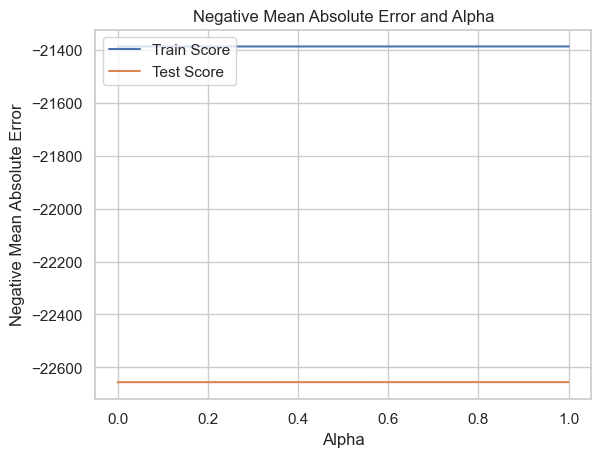

In [261]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper left')
plt.show()

### Since the Negative Mean Absolute Error stabilizes at alpha, we will choose this for further analysis

In [269]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.95143301e+02, -1.10491685e+02,  4.31893633e-01,  1.58526014e+04,
        4.95766292e+03,  2.67522925e+02,  1.44860296e+02,  3.72142627e+01,
        9.98099022e+00,  8.37384180e-01, -1.25625152e+00,  9.56211366e+00,
        2.40063129e+01,  2.59114070e+01, -1.65657031e+01,  3.33520325e+01,
        1.06315955e+04,  1.71063732e+03,  5.15333033e+03, -3.25656606e+03,
       -1.07707415e+04, -1.66831143e+04,  4.90325993e+03,  2.30361517e+03,
        1.29500470e+02,  1.29558518e+04, -1.24494048e+01,  1.65000852e+01,
       -4.74535272e+00, -7.48211587e+00, -9.58158873e+00,  5.42904399e+01,
       -8.34397108e+01, -1.14465845e-01, -1.91584375e+02, -6.26658045e+02])

In [265]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 139892.379),
 ('MSSubClass', -195.73),
 ('LotFrontage', -110.809),
 ('LotArea', 0.432),
 ('OverallQual', 15868.124),
 ('OverallCond', 4948.956),
 ('YearBuilt', 268.372),
 ('YearRemodAdd', 146.537),
 ('MasVnrArea', 37.218),
 ('BsmtFinSF1', 10.026),
 ('BsmtFinSF2', 0.878),
 ('BsmtUnfSF', -1.294),
 ('TotalBsmtSF', 9.61),
 ('1stFlrSF', 23.939),
 ('2ndFlrSF', 25.938),
 ('LowQualFinSF', -16.484),
 ('GrLivArea', 33.393),
 ('BsmtFullBath', 10527.708),
 ('BsmtHalfBath', 1641.853),
 ('FullBath', 5072.726),
 ('HalfBath', -3246.424),
 ('BedroomAbvGr', -10722.487),
 ('KitchenAbvGr', -16175.047),
 ('TotRmsAbvGrd', 4857.385),
 ('Fireplaces', 2335.226),
 ('GarageYrBlt', 129.195),
 ('GarageCars', 12841.546),
 ('GarageArea', -12.113),
 ('WoodDeckSF', 16.602),
 ('OpenPorchSF', -4.72),
 ('EnclosedPorch', -7.409),
 ('3SsnPorch', -9.533),
 ('ScreenPorch', 54.334),
 ('PoolArea', -83.734),
 ('MiscVal', -0.132),
 ('MoSold', -193.058),
 ('YrSold', -629.434)]

In [270]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8164839973924516
0.7946649439195135


In [271]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 34453.77896333177


#### The model performance is evidently better than Lasso, as both train and test scores align well.

In [273]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [274]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable       Coeff
0       constant  139892.379
4    OverallQual   15868.124
26    GarageCars   12841.546
17  BsmtFullBath   10527.708
19      FullBath    5072.726
5    OverallCond    4948.956
23  TotRmsAbvGrd    4857.385
24    Fireplaces    2335.226
18  BsmtHalfBath    1641.853
6      YearBuilt     268.372
7   YearRemodAdd     146.537
25   GarageYrBlt     129.195
32   ScreenPorch      54.334
8     MasVnrArea      37.218
16     GrLivArea      33.393
14      2ndFlrSF      25.938
13      1stFlrSF      23.939
28    WoodDeckSF      16.602
9     BsmtFinSF1      10.026
12   TotalBsmtSF       9.610

In [275]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable       Coeff
0        constant  139892.379
4     OverallQual   15868.124
26     GarageCars   12841.546
17   BsmtFullBath   10527.708
19       FullBath    5072.726
5     OverallCond    4948.956
23   TotRmsAbvGrd    4857.385
24     Fireplaces    2335.226
18   BsmtHalfBath    1641.853
6       YearBuilt     268.372
7    YearRemodAdd     146.537
25    GarageYrBlt     129.195
32    ScreenPorch      54.334
8      MasVnrArea      37.218
16      GrLivArea      33.393
14       2ndFlrSF      25.938
13       1stFlrSF      23.939
28     WoodDeckSF      16.602
9      BsmtFinSF1      10.026
12    TotalBsmtSF       9.610
10     BsmtFinSF2       0.878
3         LotArea       0.432
34        MiscVal      -0.132
11      BsmtUnfSF      -1.294
29    OpenPorchSF      -4.720
30  EnclosedPorch      -7.409
31      3SsnPorch      -9.533
27     GarageArea     -12.113
15   LowQualFinSF     -16.484
33       PoolArea     -83.734
2     LotFrontage    -110.809
35         MoSold    -193.058
1      MSSubClass    -195.730
36         YrSold    -629.434
20       HalfBath   -3246.424
21   BedroomAbvGr  -10722.487
22   KitchenAbvGr  -16175.047

In [276]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable       Coeff
0        constant  139892.379
4     OverallQual   15868.124
26     GarageCars   12841.546
17   BsmtFullBath   10527.708
19       FullBath    5072.726
5     OverallCond    4948.956
23   TotRmsAbvGrd    4857.385
24     Fireplaces    2335.226
18   BsmtHalfBath    1641.853
6       YearBuilt     268.372
7    YearRemodAdd     146.537
25    GarageYrBlt     129.195
32    ScreenPorch      54.334
8      MasVnrArea      37.218
16      GrLivArea      33.393
14       2ndFlrSF      25.938
13       1stFlrSF      23.939
28     WoodDeckSF      16.602
9      BsmtFinSF1      10.026
12    TotalBsmtSF       9.610
10     BsmtFinSF2       0.878
3         LotArea       0.432
34        MiscVal      -0.132
11      BsmtUnfSF      -1.294
29    OpenPorchSF      -4.720
30  EnclosedPorch      -7.409
31      3SsnPorch      -9.533
27     GarageArea     -12.113
15   LowQualFinSF     -16.484
33       PoolArea     -83.734
2     LotFrontage    -110.809
35         MoSold    -193.058
1      MSSubClass    -195.730
36         YrSold    -629.434
20       HalfBath   -3246.424
21   BedroomAbvGr  -10722.487
22   KitchenAbvGr  -16175.047

### Observation:

### While Ridge Regression showed better performance based on R2 values for both Train and Test datasets,

### choosing Lasso is recommended due to its ability to assign zero values to insignificant features,

### allowing for the selection of predictive variables.

### Opting for a simple yet robust model is often advisable.


In [282]:
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

NameError: name 'pred' is not defined

### Conclusion

### Recommendations for Surprise Housing involve keeping a close watch on influential predictors affecting house prices.

### Noteworthy features with higher positive coefficients signify a potential uptick in sale value.
### A few standout features include:

#### Features with Higher Positive Coefficients:

1. GrLivArea: The square footage of above-grade (ground) living area.

2. OverallQual: A rating that assesses the overall material and finish quality of the house.

3. TotalBsmtSF: The total square footage of the basement area.

4. GarageArea: The size of the garage measured in square feet.

### Features with higher negative coefficients suggest a potential decrease in sale value.

1. MSSubClass: Identifies the type of dwelling involved in the sale.

### When the market value of the property is lower than the predicted sale price, it might be a good time to buy.
